In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import torch
from regressor import *
from density_estimation import * 
from variational_inference import *
from utils.visual import * 
from targets import *

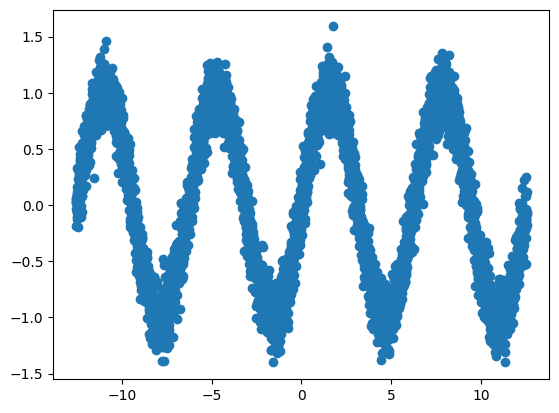

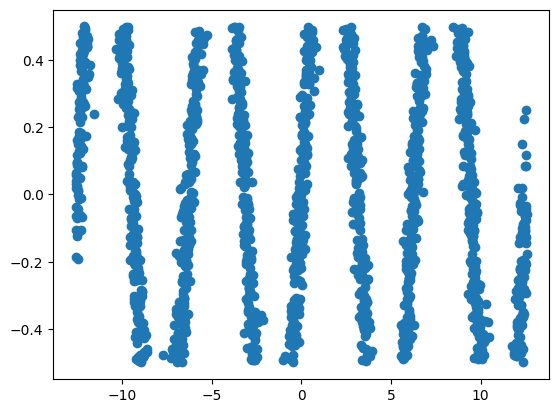

In [10]:
num_samples = 5000
D_theta = torch.linspace(-4*math.pi, 4*math.pi,num_samples).unsqueeze(-1)
D_x = torch.sin(D_theta) + torch.randn([num_samples,1])*0.15
plt.scatter(D_theta, D_x)
plt.show()
D_theta_out = D_theta[torch.abs(D_x)>0.5].unsqueeze(-1)
D_theta = D_theta[torch.abs(D_x)<0.5].unsqueeze(-1)

D_x = D_x[torch.abs(D_x)<0.5].unsqueeze(-1)

plt.scatter(D_theta, D_x)
plt.show()

In [ ]:
epochs = 500
mc_samples = 10
list_nn = []
for _ in range(mc_samples):
    f = regressor(D_theta, D_x, [64,64])
    f.train(epochs,None, verbose =True)
    list_nn.append(f)
test = torch.linspace(-4*math.pi, 4*math.pi,500).unsqueeze(-1)
predictions = [f.f(test) for f in list_nn]
pred = torch.cat(predictions, dim = -1)
mean, cov = torch.mean(pred, dim=-1), torch.sqrt(torch.var(pred, dim =-1))

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 481/500 [00:48<00:01, 10.38it/s, loss = 7.1233; device = cpu]

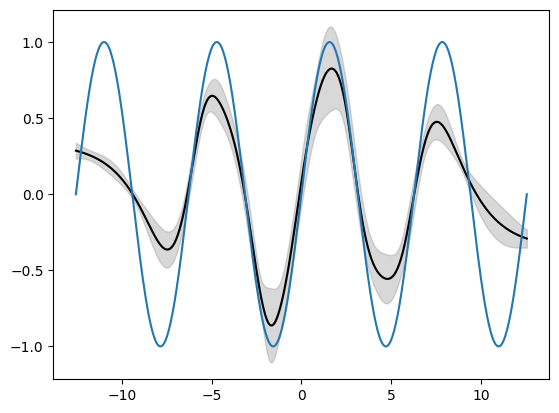

In [8]:
plt.plot(test.squeeze(-1).numpy(),mean.detach().numpy(), color = 'black')
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() + 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() - 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.plot(test, torch.sin(test))